In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
train_1 = pd.read_csv('ACT1_train_450.csv')

In [3]:
train_1.head(5)

,Unnamed: 0,D_212,D_213,D_214,D_215,D_216,D_217,D_219,D_294,D_295,...,D_7351,D_7352,D_7954,D_7955,D_7957,D_7958,D_8051,D_8053,D_8054,Act
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.0179
1,1,0,0,0,0,0,0,0,4,4,...,0,0,0,0,0,0,0,0,0,4.3003
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.2697
3,3,0,0,0,0,0,0,0,1,0,...,0,0,2,2,3,2,1,1,1,6.1797
4,4,0,0,0,0,0,0,0,0,0,...,2,0,0,2,0,1,0,0,1,4.3003


In [4]:
from sklearn.model_selection import train_test_split
import numpy as np
y = train_1['Act'].values
train_1 = train_1.drop(['Act', 'Unnamed: 0'], axis = 1)
x = train_1.values
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=0)


In [5]:
print(np.shape(Y_train), np.shape(X_train), np.shape(Y_test), np.shape(X_test))
Y_train = np.reshape(Y_train,(len(Y_train),1))
Y_test = np.reshape(Y_test,(len(Y_test),1))


(22344,) (22344, 442) (7449,) (7449, 442)


In [6]:
def r_square(X, Y):
    """ r^2 value defined by the competition host, r^2 = 1 indicates 100% prediction accuracy
    """
    avx = np.mean(X)
    avy = np.mean(Y)
    sum1, sumx, sumy = 0, 0, 0
    for i in range(len(X)):
        sum1 += (X[i] - avx)*(Y[i] - avy)
        sumx += (X[i] - avx)*(X[i] - avx)
        sumy += (Y[i] - avy)*(Y[i] - avy)
    print(len(X), sum1, sumx, sumy)
    return sum1*sum1/(sumx*sumy)

In [7]:
from keras import backend as K
#Keras R_2 function
R_2 = []
def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

Using TensorFlow backend.


In [8]:
from sklearn.metrics import make_scorer
#Keras MAPE function
MAPE = []
def mean_ape(y_true, y_pred):
    return K.mean(K.abs((y_true-y_pred)/y_true))*100
#Scikit learn mape function
def mean_apes(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100
mape_func = make_scorer(mean_apes)

In [9]:
from tensorflow.keras.models import Sequential
import keras
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam 
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [17]:
#Keras model
for epochs in [200]:
    for batch in [60]:
        K.clear_session()
        model = keras.models.Sequential();
        model.add(keras.layers.core.Dense(units = 50, activation='relu', input_dim = 442));
        model.add(keras.layers.core.Dense(units = 25, activation = 'relu'))
        model.add(keras.layers.core.Dense(1, activation = 'relu'));
        adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False);
        model.compile(loss="mean_squared_error", optimizer=adam, metrics = [coeff_determination, mean_ape,'mae']);
        print(model.summary(), 'Epochs = ', epochs, 'Batch =', batch);
        history = model.fit(X_train, Y_train, epochs = epochs, batch_size= batch, verbose = 1);
        #print(model.evaluate(X_val, Y_val,verbose=False)[1], )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                22150     
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 23,451
Trainable params: 23,451
Non-trainable params: 0
_________________________________________________________________
None Epochs =  200 Batch = 60
Epoch 1/200
22344/22344 [==============================] - 1s 27us/step - loss: 0.8799 - coeff_determination: -1.3516 - mean_ape: 13.8009 - mean_absolute_error: 0.6578
Epoch 2/200
22344/22344 [==============================] - 0s 19us/step - loss: 0.3211 - coeff_determination: 0.1549 - mean_ape: 8.9296 - mean_absolute_error: 0.4296
Epoch 3/200
22344/22344 [=============

22344/22344 [==============================] - 0s 18us/step - loss: 0.0996 - coeff_determination: 0.7318 - mean_ape: 4.7420 - mean_absolute_error: 0.2284
Epoch 46/200
22344/22344 [==============================] - 0s 18us/step - loss: 0.1017 - coeff_determination: 0.7329 - mean_ape: 4.8037 - mean_absolute_error: 0.2315
Epoch 47/200
22344/22344 [==============================] - 0s 18us/step - loss: 0.0962 - coeff_determination: 0.7422 - mean_ape: 4.6520 - mean_absolute_error: 0.2244
Epoch 48/200
22344/22344 [==============================] - 0s 18us/step - loss: 0.0955 - coeff_determination: 0.7446 - mean_ape: 4.6437 - mean_absolute_error: 0.2239
Epoch 49/200
22344/22344 [==============================] - 0s 18us/step - loss: 0.0947 - coeff_determination: 0.7480 - mean_ape: 4.6204 - mean_absolute_error: 0.2227
Epoch 50/200
22344/22344 [==============================] - 0s 17us/step - loss: 0.0974 - coeff_determination: 0.7428 - mean_ape: 4.6800 - mean_absolute_error: 0.2255
Epoch 51/20

22344/22344 [==============================] - 0s 18us/step - loss: 0.0510 - coeff_determination: 0.8631 - mean_ape: 3.3729 - mean_absolute_error: 0.1619
Epoch 143/200
22344/22344 [==============================] - 0s 18us/step - loss: 0.0504 - coeff_determination: 0.8637 - mean_ape: 3.3635 - mean_absolute_error: 0.1612
Epoch 144/200
22344/22344 [==============================] - 0s 18us/step - loss: 0.0497 - coeff_determination: 0.8652 - mean_ape: 3.3348 - mean_absolute_error: 0.1599
Epoch 145/200
22344/22344 [==============================] - 0s 18us/step - loss: 0.0501 - coeff_determination: 0.8647 - mean_ape: 3.3553 - mean_absolute_error: 0.1608
Epoch 146/200
22344/22344 [==============================] - 0s 18us/step - loss: 0.0482 - coeff_determination: 0.8695 - mean_ape: 3.2903 - mean_absolute_error: 0.1577
Epoch 147/200
22344/22344 [==============================] - 0s 18us/step - loss: 0.0522 - coeff_determination: 0.8572 - mean_ape: 3.4299 - mean_absolute_error: 0.1644
Epoch 

In [18]:
print(history.history.keys())

dict_keys(['loss', 'coeff_determination', 'mean_ape', 'mean_absolute_error'])


In [19]:
print(model.evaluate(X_test, Y_test,verbose=False))

[0.1963282658385411, 0.43159503199232124, 6.326329544202598, 0.30601696389958377]
[0.19959685463867888, 0.4260474082959196, 6.2983021245801, 0.30486994332828077]


In [20]:
Y_predict = model.predict(X_test)

6.298303292188821

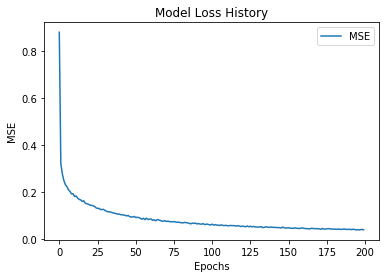

In [23]:
plt.plot(history.history['loss'])
#plt.plot(history.history['mean_ape'])
plt.title('Model Loss History')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.legend(['MSE'])


In [24]:
history.history['loss']

[0.8798652970653216,
 0.3211212313216816,
 0.277580438643918,
 0.2499100322626075,
 0.23211485167883264,
 0.22428111995697406,
 0.21038557587053414,
 0.20373836541838472,
 0.19305791415346168,
 0.19373547934019733,
 0.18219571165284332,
 0.1843821576983537,
 0.17535242643187304,
 0.16956733575712982,
 0.16787653960183535,
 0.16101452067822505,
 0.16377024027037762,
 0.15331707577692258,
 0.1510335823599045,
 0.1492413363182391,
 0.14537782359680224,
 0.14469562689188536,
 0.1427422761396934,
 0.1401812975323898,
 0.13411786849185361,
 0.1312043977507203,
 0.13159783359388916,
 0.12657184341060104,
 0.12687582689288415,
 0.1273437359147214,
 0.12177609180917545,
 0.11941242886449098,
 0.11661403284885317,
 0.11697311118789314,
 0.1150693748762509,
 0.11295947679603587,
 0.1106015565163915,
 0.10993074317823867,
 0.1072510215968982,
 0.10788534600467738,
 0.10483066405936932,
 0.1045732961169311,
 0.10345750900483605,
 0.10224407631203644,
 0.09955806872946492,
 0.10171839991578419,
 0.0

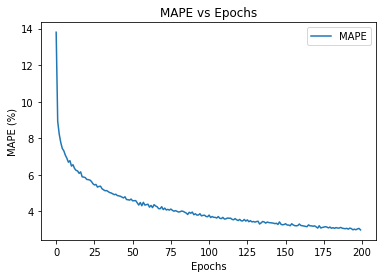

In [25]:
plt.plot(history.history['mean_ape'])
#plt.plot(history.history['mean_ape'])
plt.title('MAPE vs Epochs')
plt.ylabel('MAPE (%)')
plt.xlabel('Epochs')
plt.legend(['MAPE'])

6.3112470243121


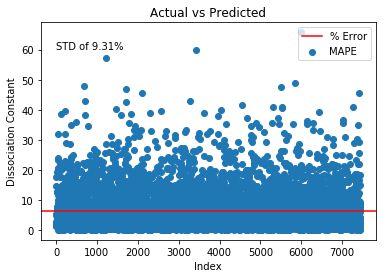

In [26]:
comparison = np.ravel(np.abs((Y_predict-Y_test)/Y_test*100))
abs_comparison = np.abs(comparison)
mask = np.where(abs_comparison>0)
plt.scatter(range(np.shape(mask)[1]), comparison[mask])
plt.axhline(y=mean_apes(Y_predict,Y_test), color='r', linestyle='-')
plt.title('Actual vs Predicted')
plt.ylabel('Dissociation Constant')
plt.xlabel('Index')
plt.legend(['% Error', 'MAPE'])
plt.text(0.05, 60, 'STD of 6.31%')
print(comparison.std())

Text(40, 800, 'STD of 6.31%')

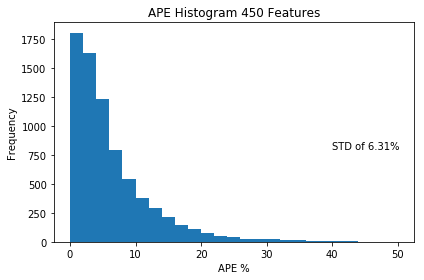

In [30]:
fig, ax= plt.subplots(1, 1,tight_layout=True)
ax.hist(comparison,np.linspace(0,50,26))
ax.set_xlabel('APE %')
ax.set_ylabel('Frequency')
ax.set_title('APE Histogram 450 Features')
plt.text(40, 800, 'STD of 6.31%')

In [28]:
# exportdata = pd.DataFrame()
# exportdata['loss_anova'] = history.history['loss']
# exportdata['mean_ape'] = history.history['mean_ape']
# exportdata['mean_absolute_error'] = history.history['mean_absolute_error']
# exportdata['coeff_determination'] = history.history['coeff_determination']
# exportdata.to_csv('450_data_plots.csv')


